# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime

%matplotlib inline


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [5]:
df.shape

(17290, 21)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [7]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# At the first glance, looking at the columns, I find id and date not useful and may influence numbers later. So for our training model, I will create new df without the id
train_df = df.drop(axis=1, columns=['id', 'date'])

In [9]:
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [10]:
train_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [11]:
all_ind_features_list = [val for val in train_df.columns if val != 'price']
all_ind_features_str = '+'.join(all_ind_features_list)
print (all_ind_features_list)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

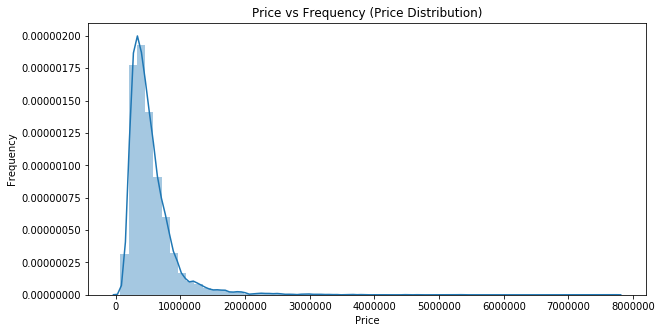

In [12]:
### Target Dependent Variable = Price
# Price vs Count
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(train_df.price, kde=True, bins=60);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');


In [13]:
# Price Distribution is skewed to the right

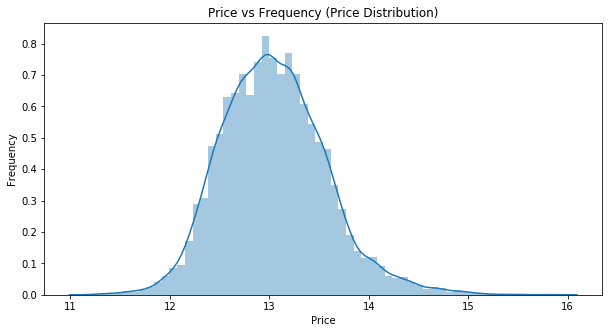

In [14]:
# Log func 
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(np.log(train_df.price), kde=True, bins=60);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');

In [15]:
mlr_model = smf.ols(formula=f'price~{all_ind_features_str}', data=train_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2350.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:29:20   Log-Likelihood:            -2.3601e+05
No. Observations:               17290   AIC:                         4.721e+05
Df Residuals:                   17272   BIC:                         4.722e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.567e+06   3.33e+06      1.372      0.170   -1.96e+06    1.11e+07
bedrooms      -3.627e+04   2116.413    -17.137      0.000   -4.04e+04   -3.21e+04
bathrooms      4.126e+04   3700.592     11.150      0.000     3.4e+04    4.85e+04
sqft_living     114.2292      2.574     44.384      0.000     109.185     119.274
sqft_lot          0.1044      0.052      1.998      0.046       0.002       0.207
floors         5600.2941   4094.525      1.368      0.171   -2425.390    1.36e+04
waterfront     5.947e+05   1.93e+04     30.803      0.000    5.57e+05    6.33e+05
view           5.252e+04   2416.118     21.739      0.000    4.78e+04    5.73e+04
condition      2.627e+04   2670.585      9.835      0.000     2.1e+04    3.15e+04
grade          9.527e+04   2458.796     38.745      0.000    9.04e+04       1e+05
sqft_above       73.1258      2.578     28.367      0.000      68.073      78.179
sqft_basement    41.1032      3.008     13.663      0.000      35.206      47.000
yr_built      -2653.6616     82.565    -32.140      0.000   -2815.498   -2491.825
yr_renovated     17.4437      4.175      4.178      0.000       9.260      25.627
zipcode        -567.4119     37.523    -15.122      0.000    -640.962    -493.862
lat            6.021e+05   1.22e+04     49.222      0.000    5.78e+05    6.26e+05
long          -2.208e+05   1.49e+04    -14.830      0.000    -2.5e+05   -1.92e+05
sqft_living15    22.0718      3.929      5.618      0.000      14.371      29.773
sqft_lot15       -0.3200      0.082     -3.907      0.000      -0.481      -0.159
==============================================================================
Omnibus:                    15315.583   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1731673.987
Skew:                           3.780   Prob(JB):                         0.00
Kurtosis:                      51.441   Cond. No.                     4.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
### Pairplot

# sns.pairplot(df)

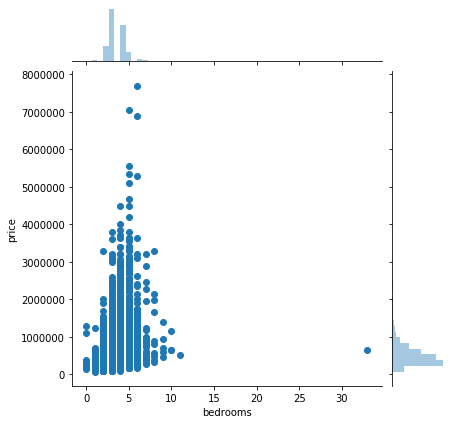

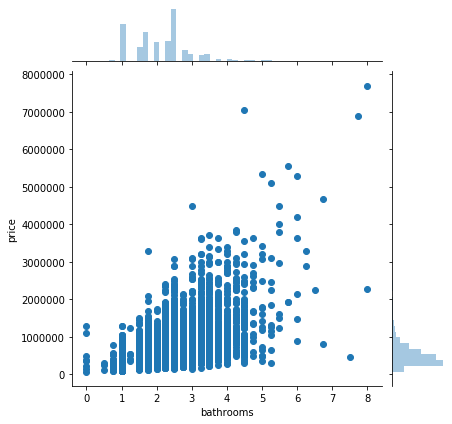

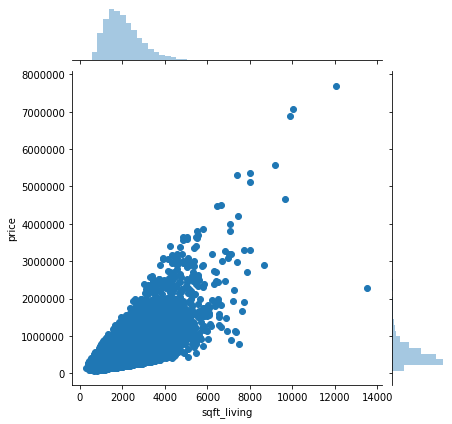

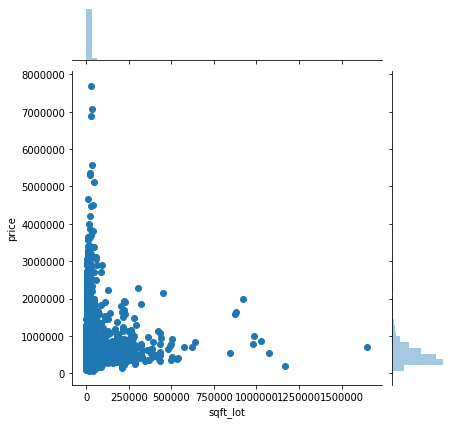

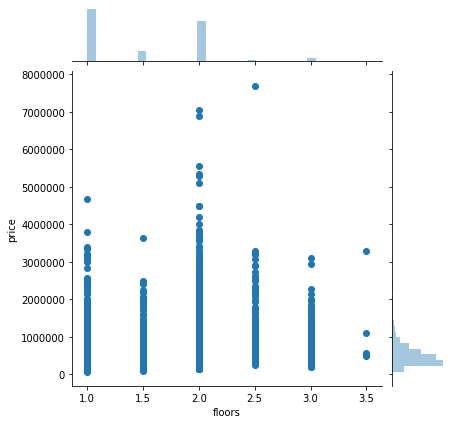

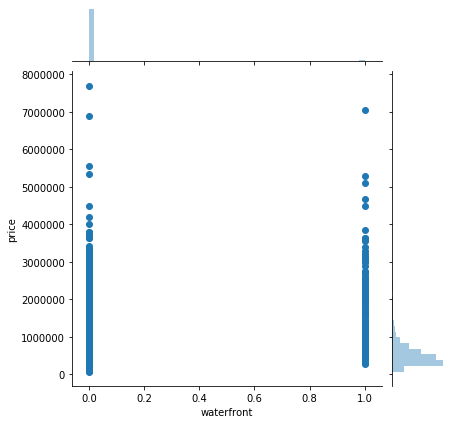

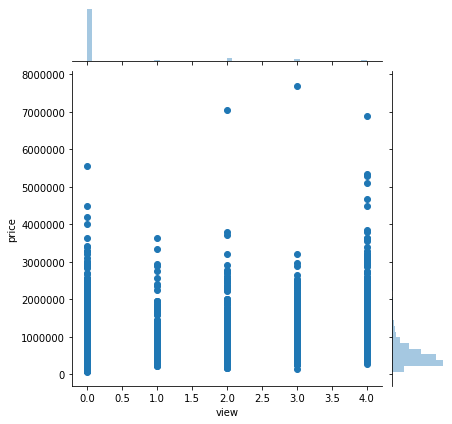

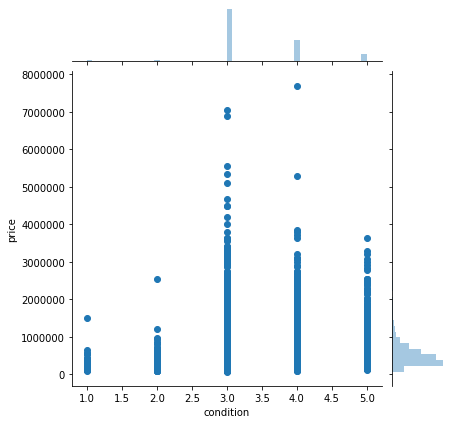

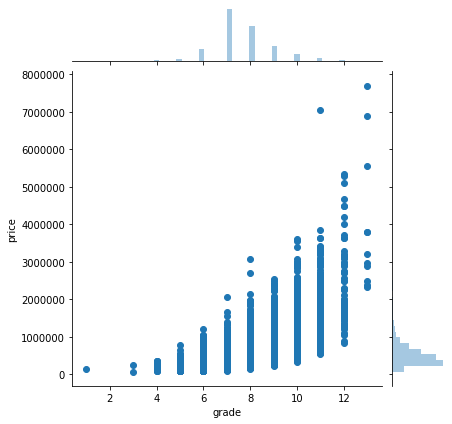

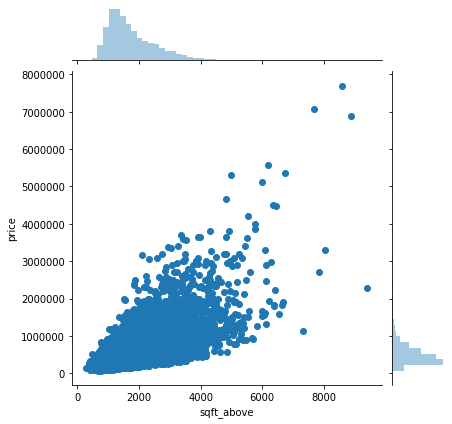

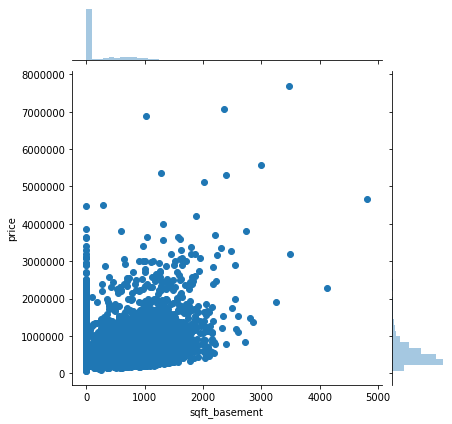

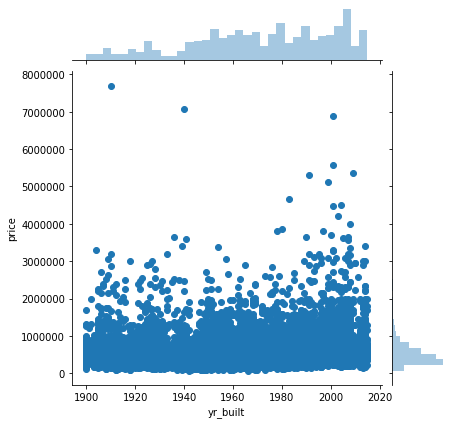

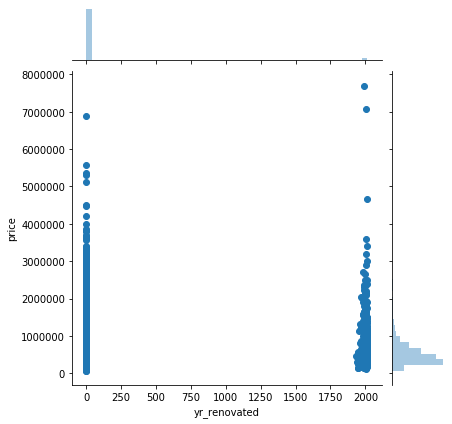

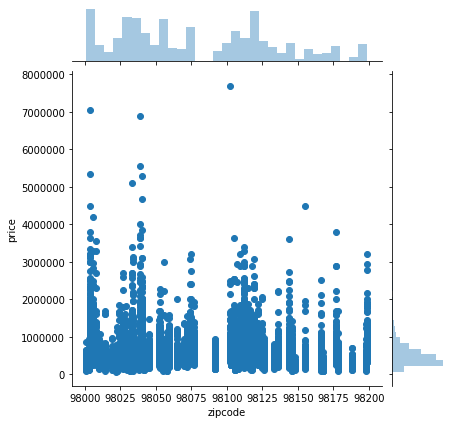

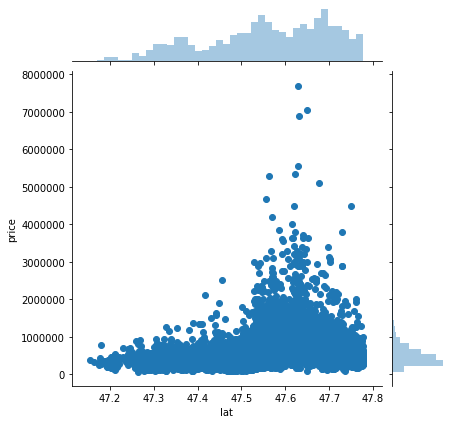

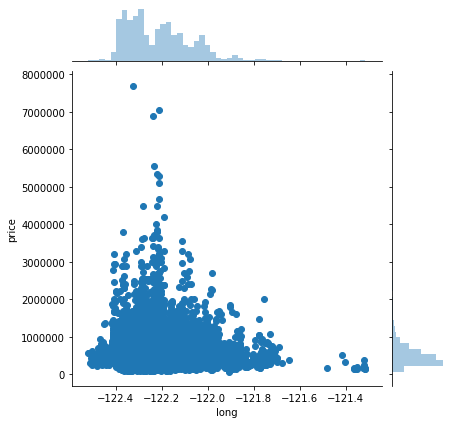

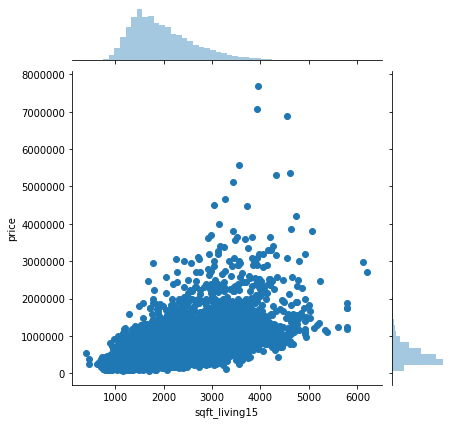

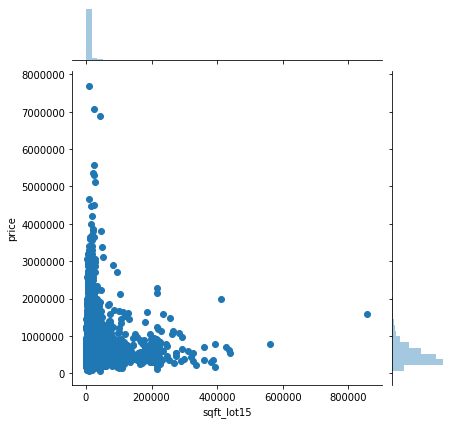

In [17]:
# Graph all graphs for each independent column

for column in all_ind_features_list:
    sns.jointplot(x=column, y='price', data=train_df, kind='scatter');


Looking at the charts, only really clear relationship is shown with column 'sqft_living'

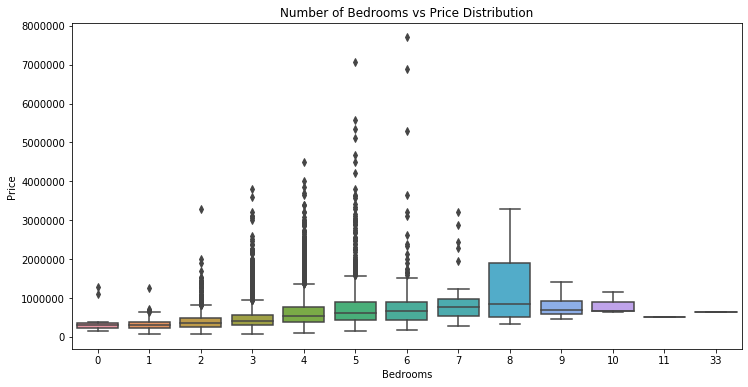

In [18]:
# Bedroom vs Price Distirbution

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='bedrooms', y="price", data=train_df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Number of Bedrooms vs Price Distribution');
# Looking at the boxplot, we know that there is one outlier of 33 rooms that costs very cheap (probably need to drop)
# We also know houses should have more than one bedroom (or is that studio?)

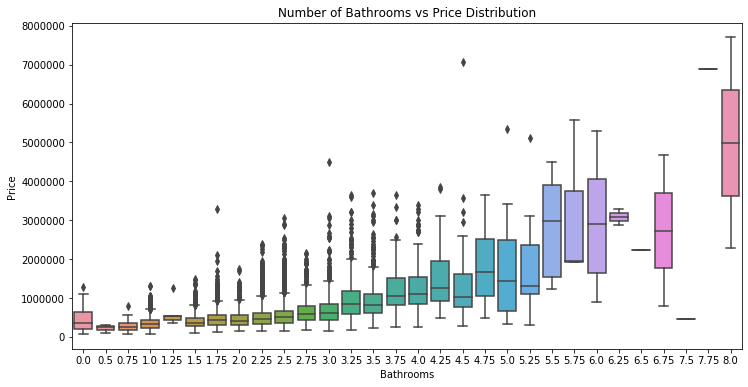

In [19]:
# Bathroom vs Price Distribution

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='bathrooms', y="price", data=train_df)
ax.set(xlabel='Bathrooms', ylabel='Price',title='Number of Bathrooms vs Price Distribution');

# Looking at this graph, we can see that there are houses with 0 bathrooms

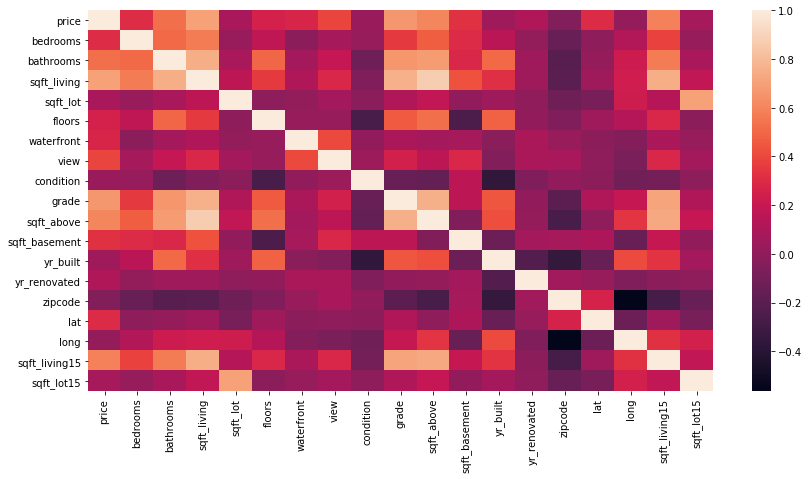

In [20]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(train_df.corr());

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

In [21]:
# Let's look at the row with 33 bedrooms and row with 7.5 bedroom from graph
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8597,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [50]:
len(df[df['bathrooms']==0])

8

In [23]:
# How to go at data cleaning:
## Should we drop these outliers?
## Is there such things as 0 bedrooms? Would that count as studio?

In [24]:
# Drop 33 bedrooms outlier
train_df.drop(train_df.loc[train_df['bedrooms'] == 33].index, axis = 0, inplace=True)


In [52]:
# Drop 8 observations with 0 bathrooms because we expect houses to have a bathroom...
# train_df.drop(train_df.loc[train_df['bathrooms'] == 0].index, axis=0, inplace=True)

In [53]:
# df[df['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3032,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
5424,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
9060,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
9286,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
12982,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


In [25]:
df.waterfront.value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [27]:
# yr_renovated col has alot of 0 as their value. 
train_df['yr_renovated'].value_counts()

0       16563
2014       71
2007       32
2005       32
2000       31
2013       30
2003       28
2006       21
1990       21
1989       21
2004       19
2002       19
1987       16
1999       16
1995       16
1998       15
2010       15
1991       15
1985       15
2009       15
1986       14
1996       14
1993       14
2001       13
1994       13
2008       13
1984       12
1988       12
2015       12
1983       11
1997       10
2012        9
1992        9
2011        8
1980        7
1982        7
1970        7
1979        7
1968        6
1977        6
1975        5
1978        5
1964        4
1973        4
1965        4
1955        3
1953        3
1981        3
1972        3
1976        3
1958        3
1945        3
1960        3
1963        3
1957        2
1962        2
1967        2
1969        2
1950        2
1971        2
1974        2
1940        2
1956        2
1946        2
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, dtype: int64

In [28]:
# Create is_renovated column: if house is equal to or older than 2000, then it is renovated.
conditions = [
    train_df['yr_renovated'] < 2000,
    train_df['yr_renovated'] >= 2000
]
choices = [
    0,
    1
]
train_df['is_renovated']=np.select(conditions, choices, train_df['yr_renovated'])
train_df['is_renovated'].value_counts()

0    16921
1      368
Name: is_renovated, dtype: int64

In [60]:
datetime.now().year

2020

In [29]:
# Create yr_old column using yr_built
train_df['yr_old'] = np.where(train_df['yr_built'], datetime.now().year - train_df['yr_built'], train_df['yr_built'])
train_df['yr_old'].value_counts()

6      453
16     360
15     344
14     343
17     337
13     335
43     323
42     313
52     298
53     294
12     281
41     272
61     260
19     255
66     255
30     253
58     250
33     236
31     234
65     231
51     231
21     216
32     213
73     212
57     211
54     206
60     202
40     201
44     197
70     196
36     196
22     191
26     188
78     188
69     184
68     184
35     183
67     181
72     180
29     177
59     176
62     175
34     173
27     173
20     171
7      169
11     167
64     166
39     164
18     164
28     163
63     162
24     157
37     157
55     151
94     151
71     150
45     144
25     141
23     139
56     139
95     139
77     136
79     133
8      126
47     124
48     120
46     117
80     117
76     115
110    112
96     111
10     106
92     105
50     104
74     101
93     100
9      100
102    100
38      86
91      84
81      82
49      82
90      77
111     75
100     74
98      74
114     73
75      73
120     70
112     69

In [61]:
df.view.value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [30]:
# Create is_viewed column where if the house had been viewed 1 time or more, it is true(1)
train_df['view'].value_counts()
train_df['is_viewed'] = np.where(train_df['view'] > 0, 1, 0)
train_df['is_viewed'].value_counts()

0    15570
1     1719
Name: is_viewed, dtype: int64

In [31]:
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated,yr_old,is_viewed
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,34,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,43,0
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,23,1
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,30,1
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,16,0


## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [32]:
# zipcode is a categorical variable -> so I want to use pd.get_dummies() dummy variables
train_df = pd.concat([train_df, pd.get_dummies(train_df['zipcode'], drop_first=True)], axis=1)
train_df.drop('zipcode', axis=1, inplace=True)
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,is_renovated,yr_old,is_viewed,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,0,23,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
df.condition.value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [64]:
df.grade.value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [33]:
# could be multicollinearity
df.yr_renovated.value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
2013       30
2003       28
2006       21
1990       21
1989       21
2004       19
2002       19
1987       16
1999       16
1995       16
1998       15
2010       15
1991       15
1985       15
2009       15
1986       14
1996       14
1993       14
2001       13
1994       13
2008       13
1984       12
1988       12
2015       12
1983       11
1997       10
2012        9
1992        9
2011        8
1980        7
1982        7
1970        7
1979        7
1968        6
1977        6
1975        5
1978        5
1964        4
1973        4
1965        4
1955        3
1953        3
1981        3
1972        3
1976        3
1958        3
1945        3
1960        3
1963        3
1957        2
1962        2
1967        2
1969        2
1950        2
1971        2
1974        2
1940        2
1956        2
1946        2
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, dtype: int64

In [34]:
train_df.is_renovated.value_counts()

0    16921
1      368
Name: is_renovated, dtype: int64

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [35]:
# Date could be useful in the sense that I can see by seasons to see when the houses are highly priced or could use it by year


### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [36]:
# looking at yr_built and yr_renovated, I created yr_old using yr_built and is_renovated using yr_renovated


### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [37]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [38]:
# your code here

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [39]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [40]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [41]:
#your code here 

### 5.4) Fit the model to the training data.

In [42]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [43]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [44]:
#your code here 

### 5.7) Determine if your model is overfit.

In [45]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [46]:
# your code here

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [47]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/